In [7]:
from PyPDF2 import PdfReader
from os import listdir
from os.path import join

mypath = '..\\pdfs'

pdf_folder_content = [f for f in listdir(mypath) if f.endswith('.pdf')]
print(f'Found {len(pdf_folder_content)} PDFs in folder!')

for pdf in pdf_folder_content:
    print(f'Analyzing {pdf}...')
    discussion_text = ''
    in_discussion = False

    try:
        reader = PdfReader(join(mypath, pdf))
    except Exception as e:
        print(f'Error reading {pdf}: {e}')
        continue

    for page in reader.pages:
        page_text = page.extract_text()
        if page_text:
            if 'Discussion' in page_text and not in_discussion:
                start_index = page_text.find('Discussion') + len('Discussion')
                end_index = page_text.find('\n\n', start_index)
                if end_index == -1:  # If no double newline is found
                    end_index = len(page_text)
                discussion_text = page_text[start_index:end_index].strip()
                break  # Stop after extracting the first paragraph

    if discussion_text:
        with open(join(mypath, pdf.replace('.pdf', '_discussion.txt')), 'w') as f:
            f.write(discussion_text)
        print(f'First paragraph of Discussion section extracted from {pdf}')
    else:
        print(f'No Discussion section found in {pdf}')


Found 107 PDFs in folder!
Analyzing 0.pdf...
First paragraph of Discussion section extracted from 0.pdf
Analyzing 101.pdf...
No Discussion section found in 101.pdf
Analyzing 103.pdf...
Error reading 103.pdf: EOF marker not found
Analyzing 107.pdf...
No Discussion section found in 107.pdf
Analyzing 109.pdf...
No Discussion section found in 109.pdf
Analyzing 11.pdf...
No Discussion section found in 11.pdf
Analyzing 111.pdf...
No Discussion section found in 111.pdf
Analyzing 113.pdf...
No Discussion section found in 113.pdf
Analyzing 114.pdf...
No Discussion section found in 114.pdf
Analyzing 115.pdf...
First paragraph of Discussion section extracted from 115.pdf
Analyzing 117.pdf...
Error reading 117.pdf: EOF marker not found
Analyzing 122.pdf...
First paragraph of Discussion section extracted from 122.pdf
Analyzing 125.pdf...
Error reading 125.pdf: EOF marker not found
Analyzing 126.pdf...
Error reading 126.pdf: EOF marker not found
Analyzing 128.pdf...
First paragraph of Discussion sec

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     --- ----------------------------------- 61.4/636.8 kB 1.1 MB/s eta 0:00:01
     ------------------------- ------------ 430.1/636.8 kB 3.9 MB/s eta 0:00:01
     -------------------------------------  634.9/636.8 kB 4.4 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
from textblob import TextBlob
from os import listdir
from os.path import join
import pandas as pd
import re 

mypath = '..\\pdfs'
discussion_files = [f for f in listdir(mypath) if f.endswith('_discussion.txt')]

df = pd.DataFrame(columns=['filename', 'polarity', 'subjectivity'])

for file in discussion_files:
    with open(join(mypath, file), 'r') as f:
        discussion_text = f.read()

    blob = TextBlob(discussion_text)

    sentiment = blob.sentiment

    match = re.match(r'(\d+)_', file)
    if match:
        index = int(match.group(1))  
    else:
        continue  


    df.loc[index] = [file, sentiment.polarity, sentiment.subjectivity]

df = df.sort_index()

df.to_csv(join(mypath, 'sentiment_analysis_results.csv'))

df


,filename,polarity,subjectivity
0,0_discussion.txt,0.073810,0.302143
3,3_discussion.txt,-0.037667,0.257000
8,8_discussion.txt,0.053668,0.354580
15,15_discussion.txt,0.094806,0.322346
16,16_discussion.txt,-0.081989,0.227688
17,17_discussion.txt,0.015706,0.252924
22,22_discussion.txt,0.046561,0.393084
23,23_discussion.txt,0.046561,0.393084
30,30_discussion.txt,-0.108796,0.343796
77,77_discussion.txt,0.028685,0.416667


<Axes: title={'center': 'Subjectivity'}>

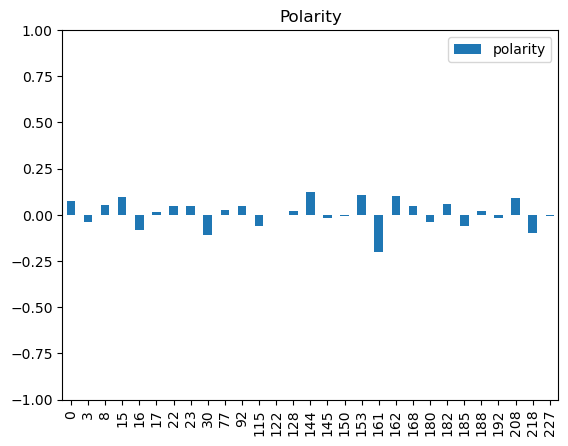

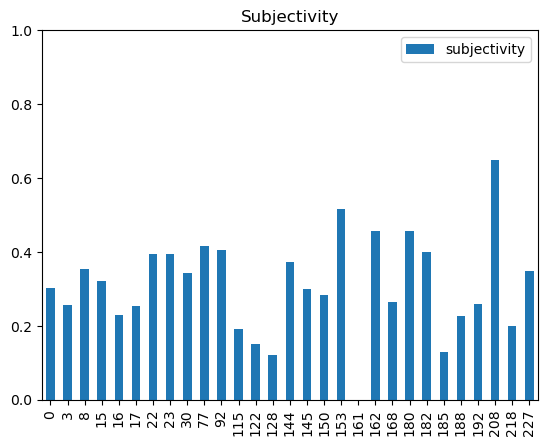

In [21]:
df.plot(y='polarity', kind='bar', ylim=[-1, 1], title='Polarity')
df.plot(y='subjectivity', kind='bar', ylim=[0, 1], title='Subjectivity')


In [22]:
df.describe()

,polarity,subjectivity
count,29.000000,29.000000
mean,0.008769,0.309885
std,0.074181,0.132461
min,-0.200000,0.000000
25%,-0.036667,0.227688
50%,0.020000,0.302143
75%,0.053668,0.393084
max,0.123505,0.647778
